<a href="https://colab.research.google.com/github/bforoura/AML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST Classification

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images.Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8% An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits and characters.

In [ ]:
# Download the full MNIST dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
# 70,000 images where each image is a 28x28 2D array of 784 features

mnist.data.shape


(70000, 784)

In [ ]:
# The outputs are just digit lables

mnist.target.shape

(70000,)

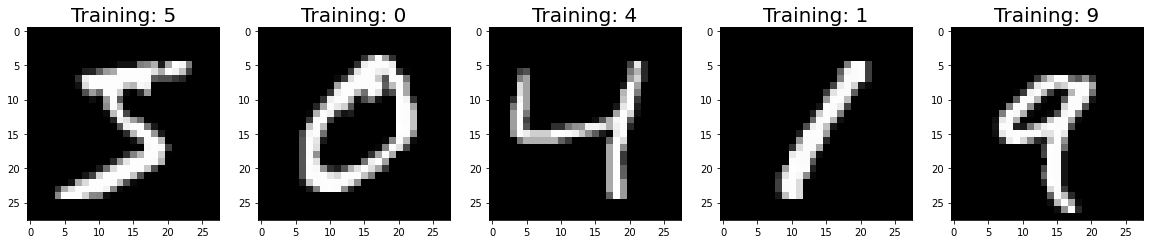

In [ ]:
# Preview a few digits

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

In [ ]:
# Dataset is already shuffled and split into training (first 60,000) and testing (last 10,000) sets

from sklearn.preprocessing import StandardScaler

X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]




In [ ]:
# Examine the dataset sizes

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

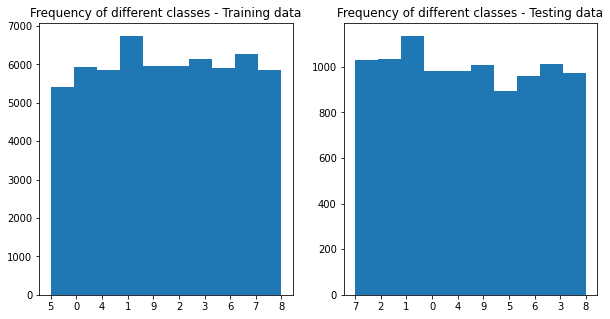

In [ ]:
# Find out class distributions in both testing and training datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');

In [ ]:
# Parallelize the first classification job over 5 workers
# Use Lasso regression 
# The SAGA solver supports the non-smooth penalty=l1 option (i.e. L1 Regularization).
# SAGA is the solver of choice for sparse multinomial logistic regression 
# and it's also suitable very large datasets.

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )

# Fit the model
lr_classifier.fit(X_train, y_train)

# Let's see what the classifier has learned
lr_classifier.classes_

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 52 epochs took 186 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  3.1min finished


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
# Accuracy scores on the training and testing sets

score1 = round(lr_classifier.score(X_train, y_train), 2) # training score
score2 = round(lr_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.94, 0.93


In [ ]:
# The confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

# compute TP, TN, FP, FN values
lr_cm = confusion_matrix(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
lr_cr = classification_report(y_true=y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(lr_cm, index=labels, columns=labels)


,0,1,2,3,4,5,6,7,8,9
0,962,0,0,3,1,2,5,4,3,0
1,0,1117,5,2,0,1,3,1,6,0
2,4,11,925,16,9,3,13,11,38,2
3,4,1,18,923,1,23,3,9,22,6
4,1,1,6,3,916,0,8,7,9,31
5,11,3,2,37,11,770,12,7,34,5
6,8,3,8,2,7,17,911,2,0,0
7,1,5,24,6,6,1,0,950,4,31
8,8,13,5,23,6,25,10,11,861,12
9,10,7,1,9,25,6,0,21,8,922


In [ ]:
# Print the classification report 

print(lr_cr)


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



Text(0.5, 145.31999999999996, 'Predicted label')

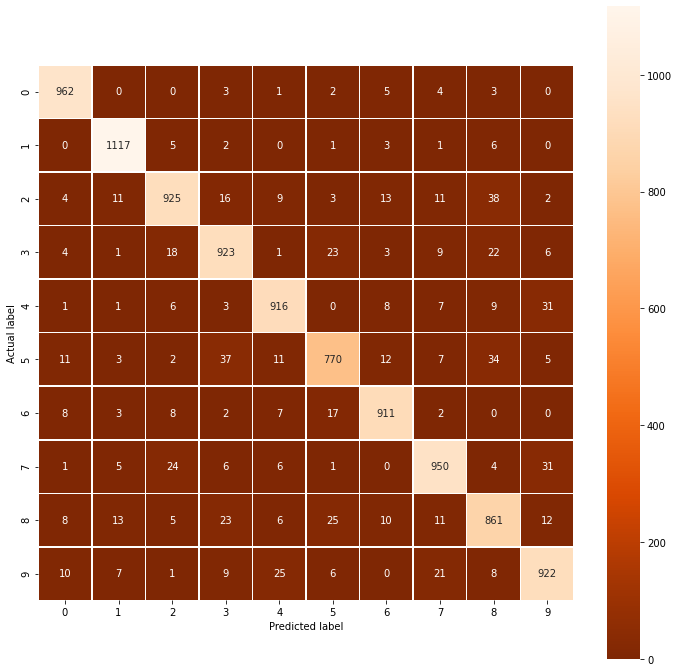

In [ ]:
# Visualize the confusion matrix as a heatmap

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(lr_cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Let's use SGD classifier this time 
# Parallelize the job over 5 workers

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, # parallelize over 5 workers
                        )

# Fit the model
sgd_classifier.fit(X_train, y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=5, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Accuracy scores on the training and testing sets

score3 = round(sgd_classifier.score(X_train, y_train), 2) # training score
score4 = round(sgd_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.88, 0.87


In [ ]:
# The confusion matrix

sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

# compute TP, TN, FP, FN values
sgd_cm = confusion_matrix(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# compute recall, precision, f1-scores
sgd_cr = classification_report(y_true=y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

# print confusion matrix
pd.DataFrame(sgd_cm, index=labels, columns=labels)


,0,1,2,3,4,5,6,7,8,9
0,902,0,8,11,1,13,2,4,39,0
1,0,1095,2,3,0,2,4,1,28,0
2,1,10,803,69,6,4,4,10,122,3
3,0,1,6,931,1,21,3,7,35,5
4,2,2,9,15,778,4,2,9,62,99
5,6,2,1,71,3,709,12,12,67,9
6,5,3,12,13,5,21,854,0,45,0
7,0,3,18,20,3,4,1,919,18,42
8,3,5,2,30,4,43,5,5,872,5
9,3,5,2,33,7,5,0,20,57,877


In [ ]:
# Print the classification report 

print(sgd_cr)


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.65      0.90      0.75       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.88     10000



In [ ]:
# Yet another classification model

from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, y_train) 


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=5,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
# Accuracy scores on the training and testing sets

score5 = round(rf_classifier.score(X_train, y_train), 2) # training score
score6 = round(rf_classifier.score(X_test, y_test), 2)   # testing score

print ("Training and Testing scores: %.2f, %.2f" %  (score5, score6))

Training and Testing scores: 1.00, 0.97


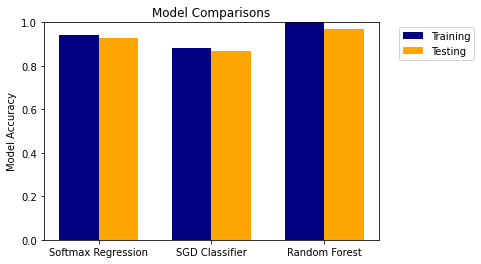

In [ ]:
# Summarize the findings for all models

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Softmax Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Comparisons')
plt.show()


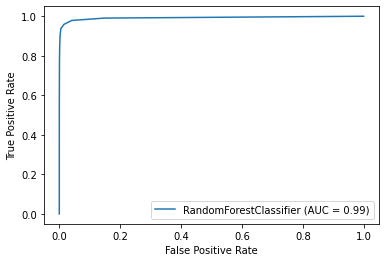

In [ ]:
# Let's train another random forest classifier and create the ROC curve

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

# Set up a binary classifier:  'digit 5' and 'all other digits'
X, y = mnist.data, mnist.target
y = y =='5'

# split the training and testing cases
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.70, 
                                                    random_state=42)

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax)

plt.show()



### Summary

Side-by-side comparison of the 3 models demonstrates that the Random Forest (RF) model provides the highest classification accuracy on both the training and testing cases. However, such a high classification accuracy on the training set is indicative of high bias, so cross-validation using k folds would be a more appropriate measure of judging the model's true power of prediction. Training times varied a great deal with SGD classifier taking the longest time while the RF model was the fastest to achieve convergence. 

An attempt was made to include SVM classification with linear or polynomial kernels, but training did not terminate due to the very large size of the training set. Parallelization helped to reduce training times for some of the algorithms but not enough for the SVM model to obtain any useful results.

The multi-class problem was converted to binary classification to further examine the RF model's precision. The plotted ROC curve for the model shows a very large AUC which is another indicator of the model's highest classification accuracy among all three models.

